# Training an intents classification model with C++ FastText

Define constants

In [1]:
from os import getcwd, path
import sys
import matplotlib.pyplot as plt
import numpy as np

BASE_PATH = path.dirname(getcwd())
sys.path.append(BASE_PATH)

DATA_UTILS = path.join(BASE_PATH, 'common/data_utils.py')
TRAIN_PATH = path.join(BASE_PATH, 'kc_data.json')
MODEL_PATH = path.join(BASE_PATH, 'fasttext_model.bin')
CLASSES_FILE = path.join(BASE_PATH, 'classes.json')

In [2]:
exec(open(DATA_UTILS).read())

Use functions from the utils to extract and preprocess the training data
Refer to `kc_data.json` for the sample data format
`get_data_pairs` is then used to parse data into a tuple of `([list_of_sentences], [list_of_labels])`

In [3]:
X_data, y_data = get_data_pairs(data_from_json(TRAIN_PATH))

classes = list(set(y_data))
num_classes = len(classes)

X_train = X_data
y_train = np.array([
    classes.index(item)
    for item in y_data
], dtype='float32')

Plot the training data

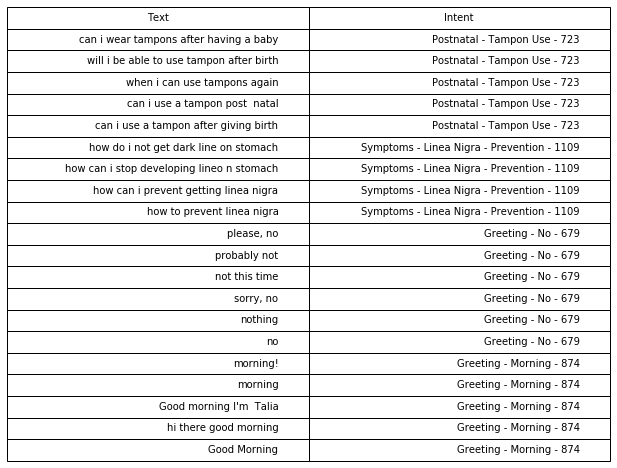

In [4]:
cell_text = [
    [item, y_data[idx] + ' - ' + str(int(y_train[idx]))] 
    for (idx, item) in enumerate(X_train)
]
plt.table(cellText=cell_text[:20],
          colLabels=['Text', 'Intent'],
          loc='center') \
   .scale(1.8,1.8)
plt.axis('off')
plt.show()

In [5]:
print('Number of samples: %s, classes: %s' % (len(X_train), num_classes))

Number of samples: 10256, classes: 1427


Save the file in fastText format
Where every class is prefixed with `'__label__'`

e.g: `'__label__greetings Hello World!'`

In [6]:
import json

TEMP_PATH = path.join(BASE_PATH, 'data.bin')

with open(TEMP_PATH, 'w') as data_file:
    for idx, item in enumerate(X_train):
        data_file.write('__label__%s %s\n' % (int(y_train[idx]), item))

with open(CLASSES_FILE, 'w') as classes_file:
    json.dump(classes, classes_file)

Start training using fastText and save the model

_Only run these lines below to re-train from an already formatted dataset_

In [7]:
from fastText import FastText

model = FastText.train_supervised(TEMP_PATH, lr=1.0, wordNgrams=2, epoch=20)

In [8]:
model.save_model(MODEL_PATH)

Evaluate model recall & precision @k=1

In [9]:
model.test(TEMP_PATH)

(10256, 0.9471528861154446, 0.9471528861154446)

Evaluate model recall & precision @k=3

In [10]:
model.test(TEMP_PATH, k=3)

(10256, 0.32585803432137284, 0.9775741029641186)

Evaluate model recall & precision @k=5

In [11]:
model.test(TEMP_PATH, k=5)

(10256, 0.19672386895475819, 0.983619344773791)